In [ ]:
import torch
from torch import nn
torch.__version__

'2.0.1+cu118'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!pwd

/content/drive/MyDrive
/content/drive/MyDrive


In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
!rm -r ~/.kaggle
print("Old kaggle folder deleted")
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
print("kaggle folder created")

rm: cannot remove '/root/.kaggle': No such file or directory
Old kaggle folder deleted
kaggle folder created


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mdwaquarazam/microorganism-image-classification

100% 101M/101M [00:06<00:00, 21.6MB/s] 
100% 101M/101M [00:06<00:00, 15.7MB/s]


In [ ]:
!rm -r /content/drive/MyDrive/Micro_Organism

In [ ]:
!mkdir bact_img

In [ ]:
! unzip microorganism-image-classification.zip -d /content/drive/MyDrive/bact_img

Archive:  microorganism-image-classification.zip
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_1.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_10.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_11.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_14.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_16.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_17.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_19.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_2.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_20.png  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_21.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_22.jpg  
  inflating: /content/drive/MyDrive/bact_img/Micro_

In [ ]:
!ls /content/drive/MyDrive/bact_img

Micro_Organism	test  train  val


In [ ]:
img_path = "/content/drive/MyDrive/bact_img"

In [ ]:
import os
def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(img_path)

there are4 directories and 0 images in '/content/drive/MyDrive/bact_img'
there are8 directories and 0 images in '/content/drive/MyDrive/bact_img/Micro_Organism'
there are0 directories and 72 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba'
there are0 directories and 168 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Euglena'
there are0 directories and 76 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Hydra'
there are0 directories and 152 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Paramecium'
there are0 directories and 85 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Rod_bacteria'
there are0 directories and 86 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Spherical_bacteria'
there are0 directories and 75 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Spiral_bacteria'
there are0 directories and 75 images in '/content/drive/MyDrive/bact_img/Micro_Organism/Yeast'
there are8 directories and 0 images in 

# **Storing files in Train, Test and Split**

In [ ]:
import os
import shutil
import random

# Define the main folder path
main_folder = '/content/drive/MyDrive/bact_img/Micro_Organism'

# Define the train, test, and validation folder paths
train_folder = '/content/drive/MyDrive/bact_img/train'
test_folder = '/content/drive/MyDrive/bact_img/test'
validation_folder = '/content/drive/MyDrive/bact_img/val'

# Define the train:test:validation ratio
train_ratio = 0.65
test_ratio = 0.3
validation_ratio = 0.05

# Create the train, test, and validation folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Iterate over the subfolders in the main folder
for subfolder_name in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder_name)

    # Create corresponding subfolders in train, test, and validation folders
    train_subfolder = os.path.join(train_folder, subfolder_name)
    test_subfolder = os.path.join(test_folder, subfolder_name)
    validation_subfolder = os.path.join(validation_folder, subfolder_name)

    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(test_subfolder, exist_ok=True)
    os.makedirs(validation_subfolder, exist_ok=True)

    # Get the file names in the subfolder
    file_names = os.listdir(subfolder_path)

    # Shuffle the file names randomly
    random.shuffle(file_names)

    # Split the file names based on the ratios
    train_files = file_names[:int(len(file_names) * train_ratio)]
    test_files = file_names[int(len(file_names) * train_ratio):int(len(file_names) * (train_ratio + test_ratio))]
    validation_files = file_names[int(len(file_names) * (train_ratio + test_ratio)):]

    # Move the files to the corresponding subfolders in train, test, and validation folders
    for file_name in train_files:
        src_path = os.path.join(subfolder_path, file_name)
        dest_path = os.path.join(train_subfolder, file_name)
        shutil.copy2(src_path, dest_path)

    for file_name in test_files:
        src_path = os.path.join(subfolder_path, file_name)
        dest_path = os.path.join(test_subfolder, file_name)
        shutil.copy2(src_path, dest_path)

    for file_name in validation_files:
        src_path = os.path.join(subfolder_path, file_name)
        dest_path = os.path.join(validation_subfolder, file_name)
        shutil.copy2(src_path, dest_path)


In [ ]:
train_path = "/content/drive/MyDrive/bact_img/train"

In [ ]:
walk_through_dir(train_path)

there are8 directories and 0 images in '/content/drive/MyDrive/bact_img/train'
there are0 directories and 46 images in '/content/drive/MyDrive/bact_img/train/Amoeba'
there are0 directories and 109 images in '/content/drive/MyDrive/bact_img/train/Euglena'
there are0 directories and 49 images in '/content/drive/MyDrive/bact_img/train/Hydra'
there are0 directories and 98 images in '/content/drive/MyDrive/bact_img/train/Paramecium'
there are0 directories and 55 images in '/content/drive/MyDrive/bact_img/train/Rod_bacteria'
there are0 directories and 55 images in '/content/drive/MyDrive/bact_img/train/Spherical_bacteria'
there are0 directories and 48 images in '/content/drive/MyDrive/bact_img/train/Spiral_bacteria'
there are0 directories and 48 images in '/content/drive/MyDrive/bact_img/train/Yeast'


In [ ]:
test_path = "/content/drive/MyDrive/bact_img/test"

In [ ]:
walk_through_dir(test_path)

there are8 directories and 0 images in '/content/drive/MyDrive/bact_img/test'
there are0 directories and 22 images in '/content/drive/MyDrive/bact_img/test/Amoeba'
there are0 directories and 50 images in '/content/drive/MyDrive/bact_img/test/Euglena'
there are0 directories and 23 images in '/content/drive/MyDrive/bact_img/test/Hydra'
there are0 directories and 46 images in '/content/drive/MyDrive/bact_img/test/Paramecium'
there are0 directories and 25 images in '/content/drive/MyDrive/bact_img/test/Rod_bacteria'
there are0 directories and 26 images in '/content/drive/MyDrive/bact_img/test/Spherical_bacteria'
there are0 directories and 23 images in '/content/drive/MyDrive/bact_img/test/Spiral_bacteria'
there are0 directories and 23 images in '/content/drive/MyDrive/bact_img/test/Yeast'


In [ ]:
train_dir = img_path + "/train"
test_dir = img_path +"/test"
val_dir = img_path + "/val"
print(train_dir, test_dir)

/content/drive/MyDrive/bact_img/train /content/drive/MyDrive/bact_img/test


[PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_14.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_27.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_10.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_19.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_22.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_32.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_39.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_11.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_16.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_24.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_31.jpg'), PosixPath('/content/drive/MyDrive/bact_img/Micro_Organism/Amoeba/Image_28.jpg'), PosixPath('/content/drive/M

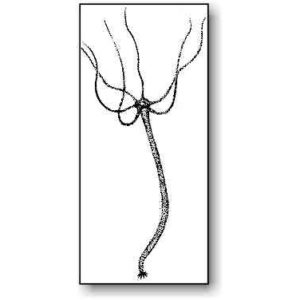

In [ ]:
import random
import numpy as np
from PIL import Image
from pathlib import Path

# Set seed
random.seed(42) # <- try changing this and see what happens

# Convert image_path to a Path object
image_path = Path(img_path)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

print((image_path_list))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
(np.asarray(img)).shape
img

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:

data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor()
])


In [ ]:
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None
                                 )

test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform,
                                 target_transform=None)

val_data= datasets.ImageFolder(root=val_dir,
                               transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 508
     Root location: /content/drive/MyDrive/bact_img/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                RandomAffine(degrees=[-10.0, 10.0], translate=(0.1, 0.1), scale=(0.9, 1.1))
                RandomPerspective(p=0.3)
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 238
     Root location: /content/drive/MyDrive/bact_img/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
      

In [ ]:
class_names=train_data.classes
class_names

['Amoeba',
 'Euglena',
 'Hydra',
 'Paramecium',
 'Rod_bacteria',
 'Spherical_bacteria',
 'Spiral_bacteria',
 'Yeast']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'Amoeba': 0,
 'Euglena': 1,
 'Hydra': 2,
 'Paramecium': 3,
 'Rod_bacteria': 4,
 'Spherical_bacteria': 5,
 'Spiral_bacteria': 6,
 'Yeast': 7}

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=4
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )
val_dataloader = DataLoader(dataset=val_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fdde8f0ff70>,
 <torch.utils.data.dataloader.DataLoader at 0x7fdde8f0fa00>)

In [ ]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"label shape: {label.shape}")

Image shape: torch.Size([4, 3, 224, 224])
label shape: torch.Size([4])


In [ ]:
img_custom, label_custom = next(iter(train_dataloader))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 400, 400]), torch.Size([32]))

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



In [ ]:

len(train_dataloader)

127

In [ ]:
1. #Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



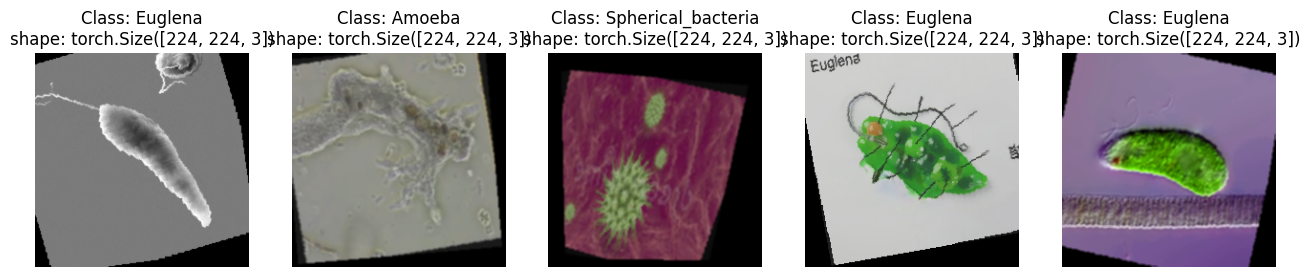

In [ ]:
import matplotlib.pyplot as plt
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

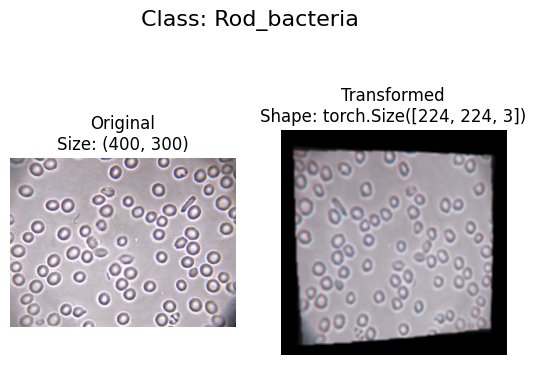

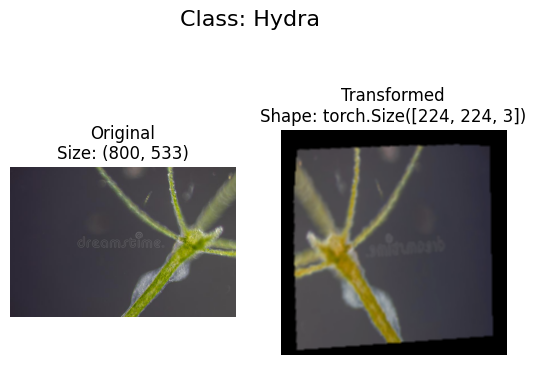

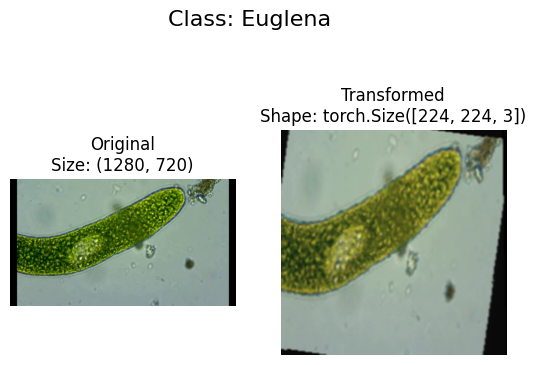

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)


22.51.27

# **TinyVGG**

In [ ]:
data_transform_simple = transforms.Compose([
    transforms.Resize(size=(400, 400)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


(Dataset ImageFolder
     Number of datapoints: 508
     Root location: /content/drive/MyDrive/bact_img/train
     StandardTransform
 Transform: Compose(
                Resize(size=(400, 400), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                RandomAffine(degrees=[-10.0, 10.0], translate=(0.1, 0.1), scale=(0.9, 1.1))
                RandomPerspective(p=0.3)
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 238
     Root location: /content/drive/MyDrive/bact_img/test
     StandardTransform
 Transform: Compose(
                Resi

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )
val_dataloader = DataLoader(dataset=val_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb73066fa60>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb73066ead0>)

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*100*100,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print("Block 1",x.shape)
    x = self.conv_block_2(x)
   # print("Block 2",x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion: https://horace.io/brrr_intro.html


In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100000, out_features=8, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 400, 400]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 0.0152,  0.0506, -0.0009, -0.0554,  0.0197,  0.0229, -0.0258,  0.0571],
        [ 0.0065,  0.0339, -0.0385, -0.0269, -0.0296,  0.0222, -0.0105,  0.0387],
        [ 0.0181,  0.0208, -0.0451, -0.0147,  0.0113,  0.0486, -0.0101,  0.0264],
        [ 0.0293,  0.0448, -0.0301, -0.0542, -0.0028,  0.0122, -0.0183,  0.0493],
        [ 0.0119,  0.0312, -0.0852, -0.0405,  0.0151,  0.0570, -0.0200,  0.0653],
        [ 0.0067,  0.0218, -0.0377,  0.0021, -0.0133,  0.0341, -0.0122,  0.0198],
        [ 0.0289,  0.0170, -0.0457, -0.0650,  0.0376,  0.0506, -0.0133, -0.0038],
        [ 0.0242,  0.0563, -0.0576, -0.0639,  0.0126,  0.0091, -0.0084,  0.0517],
        [ 0.0018,  0.0033, -0.0345, -0.0198, -0.0275,  0.0216,  0.0075,  0.0026],
        [ 0.0281,  0.0305, -0.0453, -0.0191,  0.0047,  0.0233, -0.0109,  0.0154],
        [ 0.0335,  0.0857, -0.0302, -0.0344,  0.0239,  0.0129, -0.0217,  0.0307],
        [ 0.0213, -0.0141, -0.0486, -0.0328,  0.0099,  0.0527, -0.0072,  0.0142],
        [ 0.0238

In [ ]:
model_0(image_batch.to(device))

tensor([[ 7.1010e-02,  1.1704e+00, -1.3376e+00,  7.7595e-01, -3.9678e-01,
         -2.0701e-01, -8.2090e-01, -1.3301e+00],
        [-5.9971e-01,  5.0024e-01, -3.1109e-01,  4.0930e-01, -1.4117e-01,
         -3.8041e-01, -3.0404e-01,  1.6962e-02],
        [-5.7552e-01,  4.2736e-01, -2.5390e-01,  3.3760e-01, -1.4726e-01,
         -2.9663e-01, -2.7122e-01, -1.6570e-02],
        [-2.1686e-01, -1.7852e-01,  1.2490e-01, -6.5874e-02, -1.4239e-01,
          2.1795e-01, -2.1432e-01, -1.2472e-01],
        [ 6.0602e-01,  1.1956e+00, -1.6915e+00,  8.9627e-01, -5.9117e-01,
          5.4507e-02, -9.8178e-01, -2.0719e+00],
        [ 5.2932e-01,  7.7497e-01, -1.2616e+00,  5.5399e-01, -4.4856e-01,
          3.1584e-01, -7.9952e-01, -1.8295e+00],
        [-5.7711e-01,  3.3893e-01, -1.8159e-01,  3.0041e-01, -1.7894e-01,
         -2.3849e-01, -3.0392e-01,  4.5175e-02],
        [-4.8137e-01,  6.5314e-02,  5.8648e-03,  1.0595e-01, -1.9541e-01,
          8.0102e-03, -2.7113e-01,  5.7614e-02],
        [-3.2641

In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 400, 400]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 8]                    --
├─Sequential: 1-1                        [1, 10, 200, 200]         --
│    └─Conv2d: 2-1                       [1, 10, 400, 400]         280
│    └─ReLU: 2-2                         [1, 10, 400, 400]         --
│    └─Conv2d: 2-3                       [1, 10, 400, 400]         910
│    └─ReLU: 2-4                         [1, 10, 400, 400]         --
│    └─MaxPool2d: 2-5                    [1, 10, 200, 200]         --
├─Sequential: 1-2                        [1, 10, 100, 100]         --
│    └─Conv2d: 2-6                       [1, 10, 200, 200]         910
│    └─ReLU: 2-7                         [1, 10, 200, 200]         --
│    └─Conv2d: 2-8                       [1, 10, 200, 200]         910
│    └─ReLU: 2-9                         [1, 10, 200, 200]         --
│    └─MaxPool2d: 2-10                   [1, 10, 100, 100]         --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.4544 | train_acc: 0.1311 | test_loss: 2.4116 | test_acc: 0.1797
Epoch: 2 | train_loss: 2.1569 | train_acc: 0.2009 | test_loss: 2.0464 | test_acc: 0.1797
Epoch: 3 | train_loss: 2.0272 | train_acc: 0.2107 | test_loss: 2.0439 | test_acc: 0.1914
Epoch: 4 | train_loss: 2.0263 | train_acc: 0.1830 | test_loss: 2.0144 | test_acc: 0.1914
Epoch: 5 | train_loss: 2.0018 | train_acc: 0.2151 | test_loss: 1.9808 | test_acc: 0.2266
Epoch: 6 | train_loss: 1.9691 | train_acc: 0.2165 | test_loss: 2.0162 | test_acc: 0.2344
Epoch: 7 | train_loss: 1.9378 | train_acc: 0.2134 | test_loss: 1.9616 | test_acc: 0.2695
Epoch: 8 | train_loss: 1.9272 | train_acc: 0.2651 | test_loss: 2.0350 | test_acc: 0.2656
Epoch: 9 | train_loss: 1.9480 | train_acc: 0.2397 | test_loss: 2.0132 | test_acc: 0.2640
Epoch: 10 | train_loss: 1.9113 | train_acc: 0.2522 | test_loss: 1.9503 | test_acc: 0.3103
Epoch: 11 | train_loss: 1.8998 | train_acc: 0.2433 | test_loss: 1.9764 | test_acc: 0.2785
Epoch: 12 | train_l

In [ ]:
import torch
import torch.nn as nn


class InceptionV2(nn.Module):
    def __init__(self, input_shape, output_shape):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.inception3a = InceptionModule(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionModule(256, 128, 128, 192, 32, 96, 64)
        self.inception4a = InceptionModule(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = InceptionModule(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = InceptionModule(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = InceptionModule(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = InceptionModule(528, 256, 160, 320, 32, 128, 128)
        self.inception5a = InceptionModule(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = InceptionModule(832, 384, 192, 384, 48, 128, 128)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, output_shape)

    def forward(self, x):
        x = self.stem(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)(x)
        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        x = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)(x)
        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


class InceptionModule(nn.Module):
    def __init__(self, in_channels, out1x1, reduce3x3, out3x3, reduce5x5, out5x5, out1x1_pool):
        super().__init__()
        self.branch1x1 = nn.Conv2d(in_channels, out1x1, kernel_size=1)
        self.branch3x3_reduce = nn.Conv2d(in_channels, reduce3x3, kernel_size=1)
        self.branch3x3 = nn.Conv2d(reduce3x3, out3x3, kernel_size=3, padding=1)
        self.branch5x5_reduce = nn.Conv2d(in_channels, reduce5x5, kernel_size=1)
        self.branch5x5 = nn.Conv2d(reduce5x5, out5x5, kernel_size=5, padding=2)
        self.branch1x1_pool = nn.Conv2d(in_channels, out1x1_pool, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        branch3x3 = self.branch3x3(self.branch3x3_reduce(x))
        branch5x5 = self.branch5x5(self.branch5x5_reduce(x))
        branch1x1_pool = self.branch1x1_pool(nn.MaxPool2d(kernel_size=3, stride=1, padding=1)(x))
        outputs = [branch1x1, branch3x3, branch5x5, branch1x1_pool]
        return torch.cat(outputs, dim=1)


In [ ]:
torch.manual_seed(42)
model_1 = InceptionV2(input_shape=3, # number of color channels in our image data

                  output_shape=len(class_names)).to(device)

model_1

InceptionV2(
  (stem): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (inception3a): InceptionModule(
    (branch1x1): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
    (branch3x3_reduce): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
    (branch3x3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (branch5x5_reduce): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch5x5): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (branch1x1_pool): Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1))
  )
  (inception3b): InceptionModule(
    (b

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 400, 400]), torch.Size([32]))

In [ ]:
model_1(image_batch.to(device))

tensor([[ 0.0294, -0.0206,  0.0243,  0.0429, -0.0222, -0.0451,  0.0052, -0.0006],
        [ 0.0375, -0.0127,  0.0102,  0.0363, -0.0190, -0.0455, -0.0062, -0.0044],
        [ 0.0189, -0.0157,  0.0371,  0.0426, -0.0028, -0.0560,  0.0162, -0.0059],
        [ 0.0371, -0.0178,  0.0331,  0.0363, -0.0004, -0.0387,  0.0052, -0.0227],
        [ 0.0134, -0.0297,  0.0295,  0.0398, -0.0043, -0.0290,  0.0280, -0.0066],
        [ 0.0157, -0.0222,  0.0314,  0.0428, -0.0145, -0.0419,  0.0006,  0.0035],
        [ 0.0220, -0.0208,  0.0260,  0.0486, -0.0179, -0.0390,  0.0240, -0.0006],
        [ 0.0210, -0.0293,  0.0147,  0.0213, -0.0103, -0.0338,  0.0003, -0.0106],
        [ 0.0134, -0.0281,  0.0136,  0.0585, -0.0067, -0.0434,  0.0067, -0.0143],
        [ 0.0459, -0.0246,  0.0219,  0.0403, -0.0168, -0.0462,  0.0020, -0.0050],
        [ 0.0137, -0.0289,  0.0175,  0.0376, -0.0144, -0.0451,  0.0355, -0.0120],
        [ 0.0158,  0.0013,  0.0220,  0.0508, -0.0130, -0.0366,  0.0082, -0.0165],
        [ 0.0270

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_1 = InceptionV2(input_shape=3, # number of color channels in our image data

                  output_shape=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1181 | train_acc: 0.1744 | test_loss: 2.2349 | test_acc: 0.1953
Epoch: 2 | train_loss: 2.0844 | train_acc: 0.1934 | test_loss: 2.0403 | test_acc: 0.1797
Epoch: 3 | train_loss: 2.0614 | train_acc: 0.1889 | test_loss: 2.0448 | test_acc: 0.1797
Epoch: 4 | train_loss: 2.0336 | train_acc: 0.2188 | test_loss: 2.0696 | test_acc: 0.1953
Epoch: 5 | train_loss: 2.0365 | train_acc: 0.2165 | test_loss: 2.0485 | test_acc: 0.1953
Epoch: 6 | train_loss: 2.0279 | train_acc: 0.1978 | test_loss: 2.0445 | test_acc: 0.2070
Epoch: 7 | train_loss: 2.0309 | train_acc: 0.2084 | test_loss: 2.0371 | test_acc: 0.1953
Epoch: 8 | train_loss: 2.0344 | train_acc: 0.1906 | test_loss: 2.0430 | test_acc: 0.1953
Epoch: 9 | train_loss: 2.0295 | train_acc: 0.2084 | test_loss: 2.0527 | test_acc: 0.1953
Epoch: 10 | train_loss: 2.0249 | train_acc: 0.2084 | test_loss: 2.0439 | test_acc: 0.1953
Epoch: 11 | train_loss: 2.0247 | train_acc: 0.1992 | test_loss: 2.0471 | test_acc: 0.1953
Epoch: 12 | train_l

# **Transfer Learning**

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 144MB/s]


In [ ]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir,
                                 transform= auto_transforms,
                                 target_transform=None
                                 )

test_data= datasets.ImageFolder(root=test_dir,
                                transform=auto_transforms,
                                 target_transform=None)

val_data= datasets.ImageFolder(root=val_dir,
                               transform=auto_transforms,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 508
     Root location: /content/drive/MyDrive/bact_img/train
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BICUBIC
            ),
 Dataset ImageFolder
     Number of datapoints: 238
     Root location: /content/drive/MyDrive/bact_img/test
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BICUBIC
            ))

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=8
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )
val_dataloader = DataLoader(dataset=val_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fe104471420>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe104471780>)

In [ ]:
summary(model=model,
        input_size=(4, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [4, 3, 224, 224]     [4, 1000]            --                   True
├─Sequential (features)                                      [4, 3, 224, 224]     [4, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [4, 3, 224, 224]     [4, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [4, 3, 224, 224]     [4, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [4, 32, 112, 112]    [4, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [4, 32, 112, 112]    [4, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [4, 32, 112, 112]    [4, 16, 112,

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)
print("Number of Classes", len(class_names))

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

Number of Classes 8


In [ ]:
summary(model,
        input_size=(4, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [4, 3, 224, 224]     [4, 8]               --                   True
├─Sequential (features)                                      [4, 3, 224, 224]     [4, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [4, 3, 224, 224]     [4, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [4, 3, 224, 224]     [4, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [4, 32, 112, 112]    [4, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [4, 32, 112, 112]    [4, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [4, 32, 112, 112]    [4, 16, 112,

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5883 | train_acc: 0.4551 | test_loss: 1.4651 | test_acc: 0.4778
Epoch: 2 | train_loss: 1.3016 | train_acc: 0.5430 | test_loss: 1.4193 | test_acc: 0.5611
Epoch: 3 | train_loss: 1.0689 | train_acc: 0.6250 | test_loss: 1.5836 | test_acc: 0.5694
Epoch: 4 | train_loss: 0.8638 | train_acc: 0.6973 | test_loss: 1.6535 | test_acc: 0.5278
Epoch: 5 | train_loss: 0.7907 | train_acc: 0.7266 | test_loss: 1.5407 | test_acc: 0.5750
Epoch: 6 | train_loss: 0.6986 | train_acc: 0.7715 | test_loss: 1.6343 | test_acc: 0.5819
Epoch: 7 | train_loss: 0.5775 | train_acc: 0.8066 | test_loss: 1.4874 | test_acc: 0.5972
Epoch: 8 | train_loss: 0.4825 | train_acc: 0.8379 | test_loss: 1.5805 | test_acc: 0.6347
Epoch: 9 | train_loss: 0.4926 | train_acc: 0.8359 | test_loss: 1.4967 | test_acc: 0.6278
Epoch: 10 | train_loss: 0.4127 | train_acc: 0.8789 | test_loss: 1.9098 | test_acc: 0.5750
Epoch: 11 | train_loss: 0.4277 | train_acc: 0.8457 | test_loss: 1.7688 | test_acc: 0.6181
Epoch: 12 | train_l

In [ ]:
model_3 = torchvision.models.efficientnet_b2(pretrained=True).to(device)

# Freeze the base layers
for param in model_3.parameters():
  param.requires_grad = False

# Change the classifier head (to suit our problem)
torch.manual_seed(42)
model_3.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(in_features=1408, out_features=len(class_names), bias=True)
).to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-bcdf34b7.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 73.6MB/s]


In [ ]:
summary(model_3,
        input_size=(4, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [4, 3, 224, 224]     [4, 8]               --                   Partial
├─Sequential (features)                                      [4, 3, 224, 224]     [4, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [4, 3, 224, 224]     [4, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [4, 3, 224, 224]     [4, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [4, 32, 112, 112]    [4, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [4, 32, 112, 112]    [4, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [4, 32, 112, 112]    [4, 1

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50




# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9751 | train_acc: 0.7070 | test_loss: 1.2204 | test_acc: 0.5889
Epoch: 2 | train_loss: 0.9430 | train_acc: 0.6680 | test_loss: 1.1649 | test_acc: 0.6319
Epoch: 3 | train_loss: 1.0069 | train_acc: 0.6543 | test_loss: 1.1761 | test_acc: 0.6278
Epoch: 4 | train_loss: 0.8797 | train_acc: 0.6934 | test_loss: 1.2093 | test_acc: 0.6236
Epoch: 5 | train_loss: 0.8247 | train_acc: 0.7188 | test_loss: 1.1741 | test_acc: 0.6264
Epoch: 6 | train_loss: 0.8349 | train_acc: 0.7070 | test_loss: 1.1505 | test_acc: 0.6431
Epoch: 7 | train_loss: 0.8086 | train_acc: 0.7090 | test_loss: 1.2419 | test_acc: 0.5972
Epoch: 8 | train_loss: 0.8048 | train_acc: 0.7207 | test_loss: 1.1768 | test_acc: 0.6528
Epoch: 9 | train_loss: 0.7541 | train_acc: 0.7539 | test_loss: 1.1698 | test_acc: 0.6319
Epoch: 10 | train_loss: 0.7206 | train_acc: 0.7422 | test_loss: 1.1444 | test_acc: 0.6736
Epoch: 11 | train_loss: 0.7732 | train_acc: 0.7402 | test_loss: 1.1720 | test_acc: 0.6264
Epoch: 12 | train_l

In [ ]:
train_data= datasets.ImageFolder(root=train_dir,
                                 transform= auto_transforms,
                                 target_transform=None
                                 )

test_data= datasets.ImageFolder(root=test_dir,
                                transform=auto_transforms,
                                 target_transform=None)

val_data= datasets.ImageFolder(root=val_dir,
                               transform=auto_transforms,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 508
     Root location: /content/drive/MyDrive/bact_img/train
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BICUBIC
            ),
 Dataset ImageFolder
     Number of datapoints: 238
     Root location: /content/drive/MyDrive/bact_img/test
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BICUBIC
            ))

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from sklearn.model_selection import ParameterGrid
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

num_epochs=15

# Define your hyperparameters and their possible values for grid search
param_grid = {
    'learning_rate': [0.0001,0.001, 0.01, 0.1],
    'batch_size': [4, 8, 16],
    # Add more hyperparameters and their values as needed
}

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your dataset
train_dataset = ImageFolder(root=train_dir,
                                 transform= auto_transforms,
                                 target_transform=None
                                 )
test_dataset = ImageFolder(root=test_dir,
                                 transform= auto_transforms,
                                 target_transform=None
                                 )

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Define the model architecture
def create_model(learning_rate, batch_size):
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    model = torchvision.models.efficientnet_b0(weights=weights).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return model, optimizer

# Define your evaluation metric (e.g., accuracy, loss, etc.)
def evaluate_model(model, dataloader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total_loss += loss.item() * images.size(0)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    model.train()
    return total_loss / total, correct / total

# Perform grid search
model = torchvision.models.efficientnet_b0(pretrained=False).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

grid = ParameterGrid(param_grid)

best_val_accuracy = 0.0
best_hyperparameters = {}
best_test_accuracy = 0.0

for config in grid:
    learning_rate = config['learning_rate']
    batch_size = config['batch_size']

    model, optimizer = create_model(learning_rate, batch_size)

    for epoch in range(num_epochs):
        # Training loop
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        test_loss, test_accuracy = evaluate_model(model, test_loader)

        # Update best hyperparameters based on validation accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_hyperparameters = {'learning_rate': learning_rate, 'batch_size': batch_size}

    print(f"Config: {config}, Best Validation Accuracy: {best_test_accuracy}")

# Train the final model using the best hyperparameters
model, optimizer = create_model(best_hyperparameters['learning_rate'], best_hyperparameters['batch_size'])

for epoch in range(num_epochs):
    # Training loop
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the final model on the test set
val_dataset = ImageFolder(root=val_dir,
                                 transform= auto_transforms,
                                 target_transform=None)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

val_loss, val_accuracy = evaluate_model(model, val_loader)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Config: {'batch_size': 4, 'learning_rate': 0.0001}, Best Validation Accuracy: 0.008403361344537815
Config: {'batch_size': 4, 'learning_rate': 0.001}, Best Validation Accuracy: 0.4831932773109244
Config: {'batch_size': 4, 'learning_rate': 0.01}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 4, 'learning_rate': 0.1}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 8, 'learning_rate': 0.0001}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 8, 'learning_rate': 0.001}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 8, 'learning_rate': 0.01}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 8, 'learning_rate': 0.1}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 16, 'learning_rate': 0.0001}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 16, 'learning_rate': 0.001}, Best Validation Accuracy: 0.6890756302521008
Config: {'batch_size': 16, 'learning_ra

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
import optuna
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your dataset
train_dataset = ImageFolder(root=train_dir,
                                 transform= auto_transforms,
                                 target_transform=None
                                 )
test_dataset = ImageFolder(root=test_dir,
                                 transform= auto_transforms,
                                 target_transform=None
                                 )

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Define the model architecture
def create_model(learning_rate, batch_size):
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    model = torchvision.models.efficientnet_b0(weights=weights).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return model, optimizer

# Define your evaluation metric (e.g., accuracy, loss, etc.)
def evaluate_model(model, dataloader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total_loss += loss.item() * images.size(0)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    model.train()
    return total_loss / total, correct / total

# Define the Optuna objective function
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    batch_size = trial.suggest_categorical('batch_size', [4, 8, 16])

    # Create and train the model using the suggested hyperparameters
    model, optimizer = create_model(learning_rate, batch_size)

    for epoch in range(num_epochs):
        # Training loop
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    test_loss, test_accuracy = evaluate_model(model, test_loader)

    # Return the negative validation loss as Optuna maximizes the objective function
    return -test_loss

# Set the number of trials (iterations)
n_trials = 10

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=n_trials)

# Get the best hyperparameters
best_hyperparameters = study.best_params

# Train the final model using the best hyperparameters
model, optimizer = create_model(best_hyperparameters['learning_rate'], best_hyperparameters['batch_size'])

for epoch in range(num_epochs):
    # Training loop
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the final model on the test set
val_dataset = ImageFolder(root=val_dir,
                                 transform= auto_transforms,
                                 target_transform=None)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

val_loss, val_accuracy = evaluate_model(model, val_loader)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


[I 2023-07-07 09:36:00,523] A new study created in memory with name: no-name-c53bc662-cce4-4ea8-a817-591ccc5a48c7
<ipython-input-33-cfe1a5786af5>:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
[I 2023-07-07 09:41:57,806] Trial 0 finished with value: -7.282722473144531 and parameters: {'learning_rate': 0.010106528883290899, 'batch_size': 4}. Best is trial 0 with value: -7.282722473144531.
[I 2023-07-07 09:46:06,408] Trial 1 finished with value: -7.282722473144531 and parameters: {'learning_rate': 0.007655880155871946, 'batch_size': 8}. Best is trial 0 with value: -7.282722473144531.
[I 2023-07-07 09:50:14,178] Trial 2 finished with value: -7.282722473144531 and parameters: {'learning_rate': 0.01658582119944281, 'batch_size': 16}. Best is trial 0 with value:

Validation Loss: 0.14271876215934753, Validation Accuracy: 0.7441860465116279
